# Volterra integral equation

$$E(t) = \frac{3a^2 + k^2 t^2 + 2akt}{3a^2} e^{bt}
  - \int_0^t E(\tau) \frac{2k^2 (t - \tau) + 2ak}{3a^2} e^{b(t - \tau)} d\tau$$

$$E(t) = f(t, a, b, k) - \int_0^t E(\tau) K(\tau, t, a, b, k) d\tau =\\
  = f(t, a, b, k) - \int_0^t G_{EK}(\tau, t, a, b, k) d\tau$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, interpolate

In [2]:
a0 = 1; b0 = 5; k0 = 1

def f(t, a=a0, b=b0, k=k0):
    return (3*a**2 + k**2*t**2 + 2*a*k*t) * np.exp(b*t) / (3*a**2)

def K(tau, t, a=a0, b=b0, k=k0):
    return (2*k**2 * (t - tau) + 2*a*k) * np.exp(b*(t - tau)) / (3*a**2)

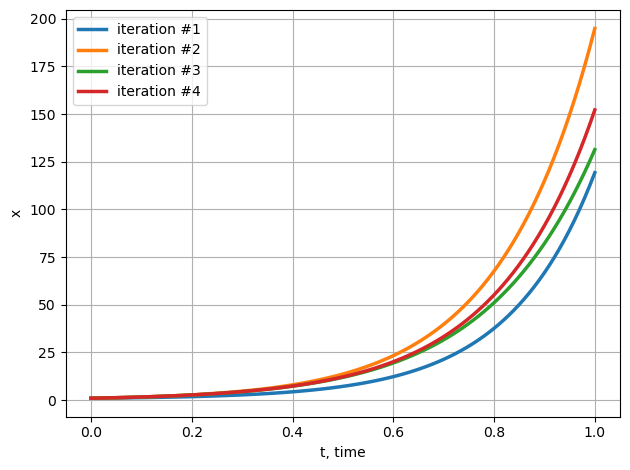

In [3]:
E = lambda t: 5
t = np.linspace(0, a0/k0, 25)
ax = plt.axes()

for i in range(1, 5):
    G = lambda tau, t: E(tau) * K(tau, t)
    x = np.empty(len(t))

    for j in range(len(t)):
        int_, err = integrate.quad(G, 0, t[j], args=(t[j],))
        assert err < 1e-5
        # print(err)
        x[j] = f(t[j]) - int_

    E = interpolate.CubicSpline(t, x, extrapolate=None)
    t_ = np.linspace(0, a0/k0, 100)
    ax.plot(t_, E(t_), lw=2.5, label=f"iteration #{i}")

ax.set_xlabel("t, time")
ax.set_ylabel("x")
ax.legend()
ax.grid()
plt.tight_layout()
# plt.savefig("plots/volterra_eq1.eps")

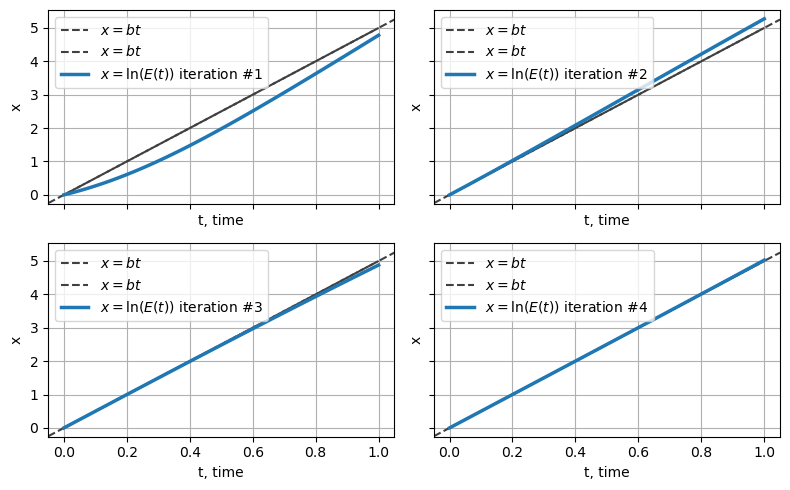

In [4]:
E = lambda t: 5
t = np.linspace(0, a0/k0, 25)
fig, axs = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)

for i, ax in enumerate(axs.flat, 1):
    G = lambda tau, t: E(tau) * K(tau, t)
    x = np.empty(len(t))

    for j in range(len(t)):
        int_, err = integrate.quad(G, 0, t[j], args=(t[j],))
        assert err < 1e-5
        # print(err)
        x[j] = f(t[j]) - int_

    E = interpolate.CubicSpline(t, x, extrapolate=None)
    t_ = np.linspace(0, a0/k0, 100)
    ax.axline((0, 0), slope=b0, c='.25', ls="--", lw=1.5, label="$x=bt$")
    ax.plot(t_, b0 * t_, c='.25', ls="--", lw=1.5, label="$x=bt$")
    ax.plot(t_, np.log(E(t_)), lw=2.5, label=f"$x=\ln(E(t))$ iteration #{i}")
    ax.set_xlabel("t, time")
    ax.set_ylabel("x")
    ax.legend()
    ax.grid()

plt.tight_layout()
# plt.savefig("plots/volterra_eq2.eps")

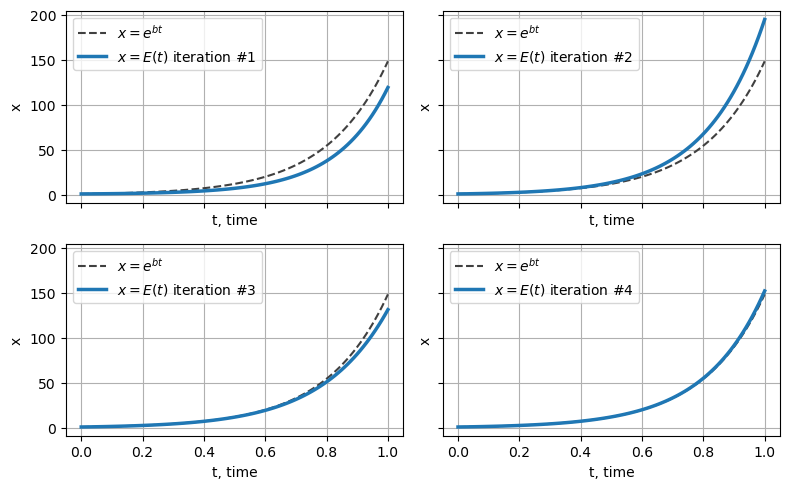

In [5]:
E = lambda t: 5
t = np.linspace(0, a0/k0, 25)
fig, axs = plt.subplots(2, 2, figsize=(8, 5), sharex=True, sharey=True)

for i, ax in enumerate(axs.flat, 1):
    G = lambda tau, t: E(tau) * K(tau, t)
    x = np.empty(len(t))

    for j in range(len(t)):
        int_, err = integrate.quad(G, 0, t[j], args=(t[j],))
        assert err < 1e-5
        # print(err)
        x[j] = f(t[j]) - int_

    E = interpolate.CubicSpline(t, x, extrapolate=None)
    t_ = np.linspace(0, a0/k0, 100)
    ax.plot(t_, np.exp(b0 * t_), c='.25', ls="--", lw=1.5, label="$x=e^{bt}$")
    ax.plot(t_, E(t_), lw=2.5, label=f"$x=E(t)$ iteration #{i}")
    ax.set_xlabel("t, time")
    ax.set_ylabel("x")
    ax.legend()
    ax.grid()

plt.tight_layout()
# plt.savefig("plots/volterra_eq3.eps")